# Prediction vs. Date/Time (Sep 14 Exps)

In [7]:

import os
import re 
import json 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta 

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

from scipy.interpolate import make_interp_spline

DIR = '/localhome/advit/sep19_exps/'
json_files = sorted([f for f in os.listdir(DIR) if f.endswith('.json')])


In [2]:
truth_3d = []; pred_3d = []; input_3d = []

for json_file in json_files:
    json_path = os.path.join(DIR, json_file)
    
    with open(json_path, 'r') as file:
        data = json.load(file)

        for d in data: 
            input_3d.append(np.array(d['input']).squeeze())
            truth_3d.append(np.array(d['output']).squeeze())
            pred_3d.append(np.array(d['prediction']).squeeze())

input_3d = np.stack(input_3d)
truth_3d = np.stack(truth_3d)
pred_3d = np.stack(pred_3d)

In [3]:
delta =  pred_3d - input_3d 
delta2 = truth_3d - input_3d

In [4]:
delta.shape

(297, 128, 256)

In [5]:
averaged_delta = np.mean(delta, axis=0)
averaged_delta2 = np.mean(delta2, axis=0)

In [6]:
min_range = min([np.amin(averaged_delta), np.amin(averaged_delta2)]) 
max_range = max([np.amax(averaged_delta), np.amax(averaged_delta2)]) 
scale = (min_range, max_range)

In [7]:
scale

(-12.634312793461964, 25.34540550154869)

In [11]:
scale = (-max_range, max_range)

In [14]:
# volatile - st dev graph (in red)
std_delta = np.std(delta, axis=0)
std_delta2 = np.std(delta2, axis=0)

In [22]:
def plot(data, title, color='bwr', scale=None):
    temperature = np.roll(data, data.shape[1] // 2, axis=1)

    fig = plt.figure(figsize=(20,9))
    map = Basemap(projection='cyl', resolution = 'i', area_thresh = 0.3, llcrnrlon=-180, llcrnrlat=-90, urcrnrlon=180, urcrnrlat=90.0, anchor = 'SW')
    map.drawcoastlines()
    map.drawcountries()
    map.drawparallels(np.arange(-90,90,15.0),labels=[1,1,0,1])
    map.drawmeridians(np.arange(-180,180,15),labels=[1,1,0,1])

    # temperature2 = upscale(temperature, fig)
    heatmap = plt.pcolormesh(
        np.linspace(-180, 180, num = temperature.shape[1]+1),
        np.linspace(-90, 90, num = temperature.shape[0]+1),
        temperature, 
        cmap=color,
        shading='flat',
        vmin = scale[0],
        vmax = scale[1]
    )

    map.colorbar(heatmap, pad=1)
    plt.title(title, 
        {
            'fontsize' : 30
        }
    )
    fig.show()

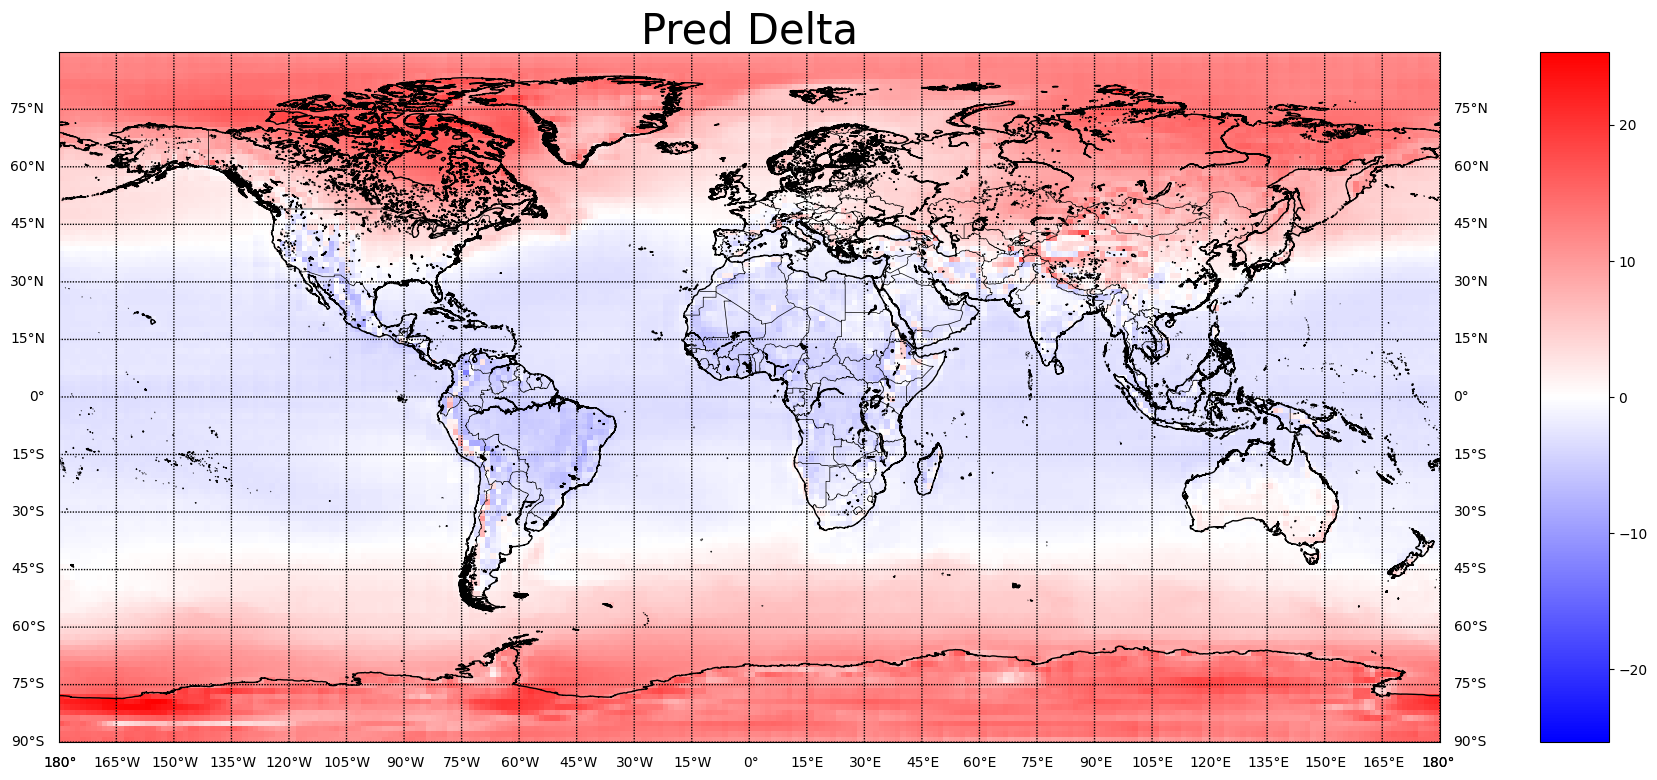

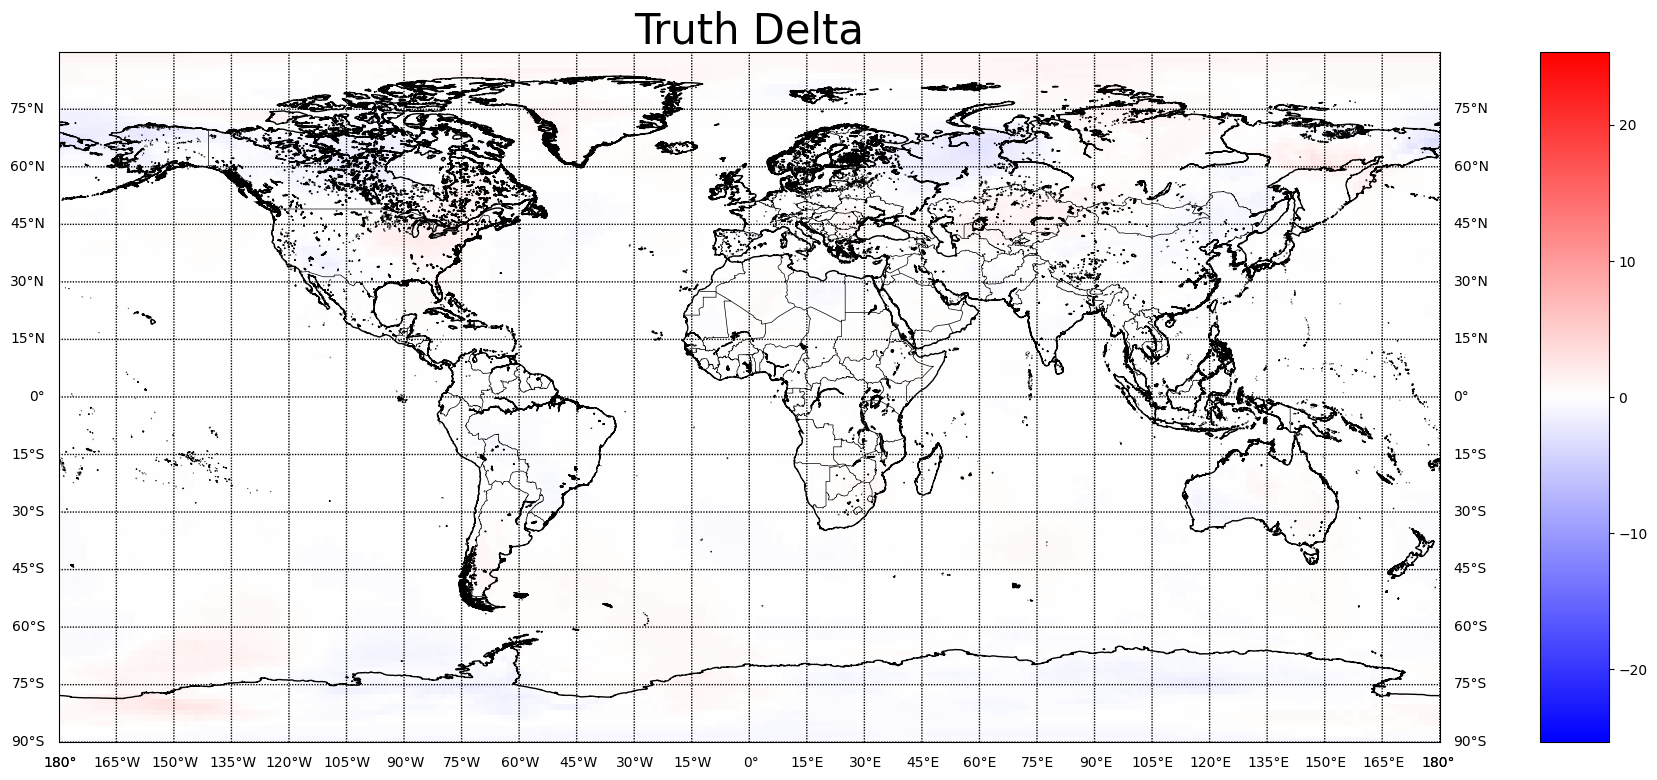

In [13]:
plot(averaged_delta, 'Pred Delta (Avg)', scale)
plot(averaged_delta2, 'Truth Delta (Avg)', scale)

In [16]:
min_range2 = min([np.amin(std_delta), np.amin(std_delta2)]) 
max_range2 = max([np.amax(std_delta), np.amax(std_delta2)]) 
scale2 = (min_range2, max_range2)

In [17]:
scale2

(0.35304436767869113, 15.940217798868089)

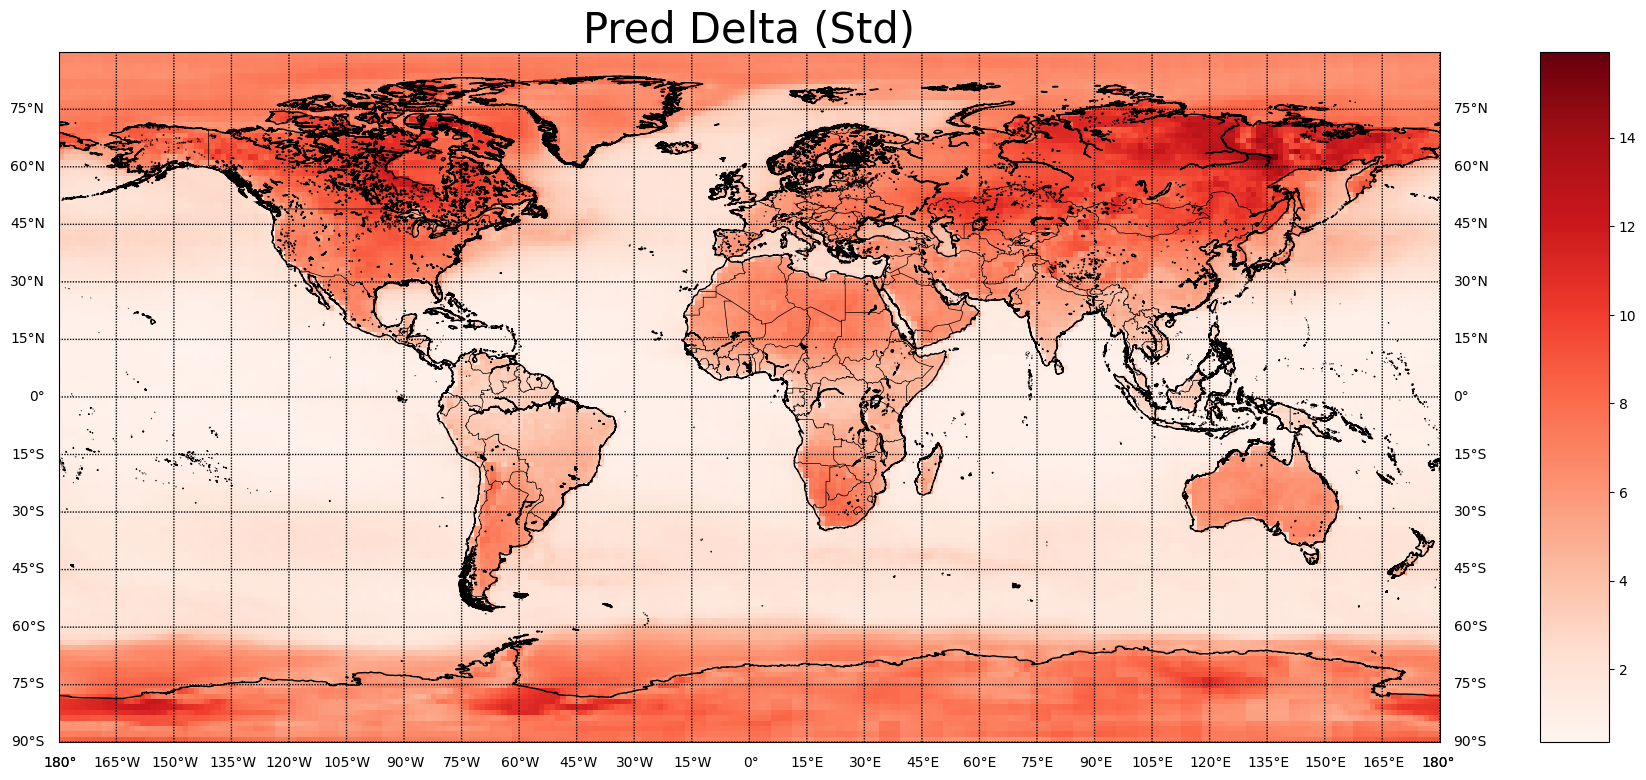

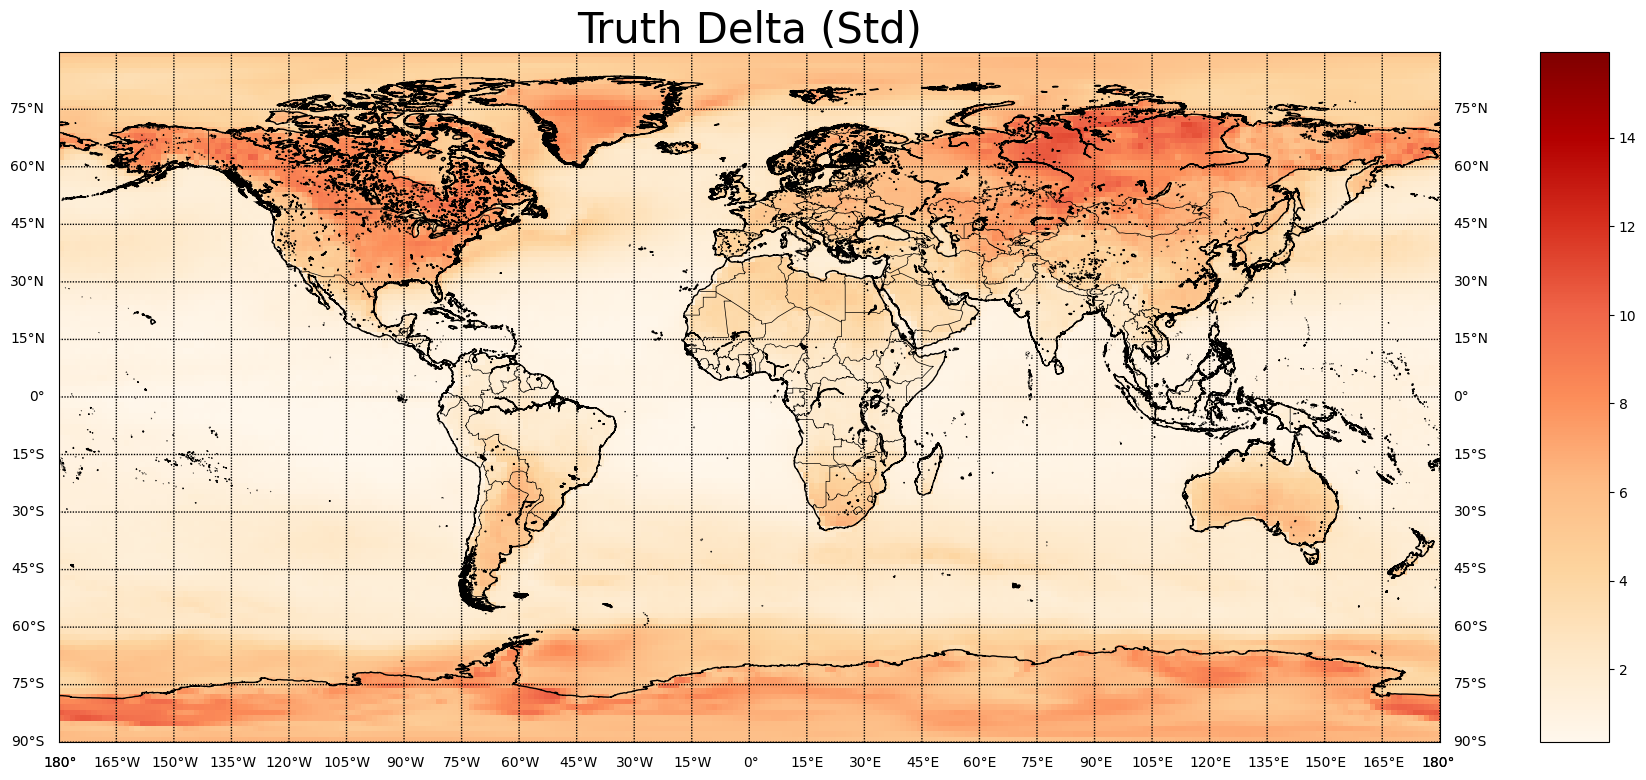

In [26]:
plot(std_delta, 'Pred Delta (Std)', color='Reds', scale=scale2)
plot(std_delta2, 'Truth Delta (Std)', color='OrRd', scale=scale2)